# Load data & remove null value

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import classification_report

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 
sub = pd.read_csv('sample_submission.csv')

train

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
0,0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,42,1,1521.0,0
83,83,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,56,0,1345.0,0
84,84,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,34,0,2926.0,1
85,85,112.0,884.0,942.83,378.49,567.06,116.77,31.81,1104.59,33,1,2352.0,1


In [2]:
# Get the features of the dataset
features = train.columns.values.tolist()[1:-1]
features

['MO HLADR+ MFI (cells/ul)',
 'Neu CD64+MFI (cells/ul)',
 'CD3+T (cells/ul)',
 'CD8+T (cells/ul)',
 'CD4+T (cells/ul)',
 'NK (cells/ul)',
 'CD19+ (cells/ul)',
 'CD45+ (cells/ul)',
 'Age',
 'Sex 0M1F',
 'Mono CD64+MFI (cells/ul)']

In [3]:
# Check if there are NaN value 
print(np.isnan(train).any())

id                          False
MO HLADR+ MFI (cells/ul)     True
Neu CD64+MFI (cells/ul)      True
CD3+T (cells/ul)            False
CD8+T (cells/ul)            False
CD4+T (cells/ul)            False
NK (cells/ul)               False
CD19+ (cells/ul)            False
CD45+ (cells/ul)            False
Age                         False
Sex 0M1F                    False
Mono CD64+MFI (cells/ul)     True
label                       False
dtype: bool


In [4]:
# Drop rows with NaN value 
train.dropna(inplace=True)
train

,id,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
0,0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,42,1,1521.0,0
83,83,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,56,0,1345.0,0
84,84,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,34,0,2926.0,1
85,85,112.0,884.0,942.83,378.49,567.06,116.77,31.81,1104.59,33,1,2352.0,1


# Split the dataset for cross validation

In [5]:
train_X = train[features]
train_Y = train['label']
test_X = test[features]

# cross validation split
sub_train_X, sub_test_X, sub_train_Y, sub_test_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

print('The number of training data：{}，the number of testing data：{}'.format(len(sub_train_X), len(sub_test_X)))

The number of training data：68，the number of testing data：18


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(max_depth = 4, random_state = 0) # Build model

rfc.fit(sub_train_X, sub_train_Y) # Train model
y_pred = rfc.predict(sub_test_X) # Test model

print(classification_report(sub_test_Y, y_pred, target_names=None))

test_pred_rfc = rfc.predict(test_X)

df = pd.DataFrame()
df['label'] = test_pred_rfc

df.to_csv('submission_RF.csv', index=True, index_label='id')

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [22]:
# absolute score on the private leaderboard
15 + (0.94 - 0.9) * 50

16.999999999999996

# Decision tree

In [134]:
# Decision Tree - Gini
dt_model_gini = DecisionTreeClassifier(max_depth = 3) # Build model
dt_model_gini.fit(sub_train_X, sub_train_Y) # Train model
y_pred_gini = dt_model_gini.predict(sub_test_X) # Test model

print(classification_report(sub_test_Y, y_pred_gini, target_names=None))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



In [154]:
test_pred_gini = dt_model_gini.predict(test_X)
test_pred_gini

df = pd.DataFrame()
df['label'] = test_pred_gini

df.to_csv('submission_gini.csv', index=True, index_label='id')

# KNN

In [166]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) # Build model
knn.fit(sub_train_X, sub_train_Y) # Train model
y_pred = knn.predict(sub_test_X) # Test model

print(classification_report(sub_test_Y, y_pred, target_names=None))

test_pred_knn = knn.predict(test_X)
test_pred_knn

df = pd.DataFrame()
df['label'] = test_pred_knn

df.to_csv('submission_KNN.csv', index=True, index_label='id')

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



# XGBoost

In [217]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()  # Build model
xgb.fit(sub_train_X, sub_train_Y) # Train model
y_pred = xgb.predict(sub_test_X) # Test model


# predictions = [round(value) for value in y_pred]


print(classification_report(sub_test_Y, y_pred, target_names=None))

test_pred_xgb = xgb.predict(test_X)

df = pd.DataFrame()
df['label'] = test_pred_xgb

df.to_csv('submission_XGB.csv', index=True, index_label='id')

[17:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18



# Neural network

Train on H=1 Epoch [400/400] Loss: 0.6134   Accuracy: 70.5882%
Subset testing on H=1, Loss of testing 0.7389
Subset testing on H=1, Accuracy of testing 50.0000 %
Train on H=2 Epoch [400/400] Loss: 0.5942   Accuracy: 72.0588%
Subset testing on H=2, Loss of testing 0.6886
Subset testing on H=2, Accuracy of testing 55.5556 %
Train on H=3 Epoch [400/400] Loss: 0.6112   Accuracy: 70.5882%
Subset testing on H=3, Loss of testing 0.7452
Subset testing on H=3, Accuracy of testing 50.0000 %
Train on H=4 Epoch [400/400] Loss: 0.6115   Accuracy: 70.5882%
Subset testing on H=4, Loss of testing 0.7444
Subset testing on H=4, Accuracy of testing 50.0000 %
Train on H=5 Epoch [400/400] Loss: 0.6091   Accuracy: 70.5882%
Subset testing on H=5, Loss of testing 0.7534
Subset testing on H=5, Accuracy of testing 50.0000 %


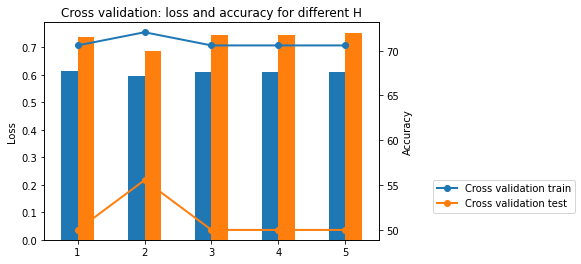

	
H_best= 2


In [208]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
torch.manual_seed(1234)

import matplotlib.pyplot as plt


# Parameters
D_in, D_out = len(features), 2     # D_in is feature number
lr = 0.01
num_epoch = 400
hidden_unit = [1, 2, 3, 4, 5]

loss_H = {} # store the loss for cross validation of H, get the best hidden unit
train_loss, Subset_test_loss = [],[] # used for storing the result and show the graph 
train_accu, Subset_test_accu = [],[] # used for storing the result and show the graph

for H in hidden_unit:
    #-----Configurable neural network (H)-----
    # build model
    class Net(nn.Module):
        def __init__(self, H): # H is variable
            super(Net, self).__init__()
            self.fc1 = nn.Linear(D_in, H)  # Single layer
            self.fc2 = nn.Linear(H, D_out)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = self.fc2(x)
            return x

    net = Net(H)
    #-------------------------------------------

    # set optimizer and loss function
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr = lr) # stochastic gradient descent

    # train
    for epoch in range(num_epoch):

        X = torch.Tensor(sub_train_X.values)
        Y = torch.LongTensor(sub_train_Y.values)
        
        # feedforward - backprop
        optimizer.zero_grad() # Zero the gradients before running the backward pass.
        output = net(X)
        loss = criterion(output, Y)
        loss.backward()
        optimizer.step()
        accu = 100 * torch.sum(Y==torch.max(output.data, 1)[1]).double() / len(Y)
        if (epoch == num_epoch-1): # Only print the final result
            print ('Train on H=%.f Epoch [%d/%d] Loss: %.4f   Accuracy: %.4f%%' 
                   %(H, epoch+1, num_epoch, loss.item(), accu.item()))
            train_loss.append(loss.item())
            train_accu.append(accu.item())

    # Test on sub_test_X, sub_test_Y, get prediction
    X = torch.Tensor(sub_test_X.values)
    Y = torch.LongTensor(sub_test_Y)
    output = net(X)
    _, predicted = torch.max(output.data, 1)
    loss = criterion(output, Y)
    loss.backward()
    optimizer.step()

    # print accuracy and loss
    print('Subset testing on H=%.f, Loss of testing %.4f' % (H, loss.item()))
    print('Subset testing on H=%.f, Accuracy of testing %.4f %%' % (H, 100 * torch.sum(Y==predicted).double() / len(Y)))
    loss_H[H] = (loss.item())
    Subset_test_loss.append(loss.item())
    Subset_test_accu.append(100 * torch.sum(Y==predicted).double() / len(Y))
    #----------------------------------------------------------------------

# After iteration, show the Training graph comparing the loss and accuracy with different H
h = pd.DataFrame({
    'Train loss': train_loss,
    'Train accuracy': train_accu,
    'Subset test loss': Subset_test_loss,
    'Subset test accuracy': Subset_test_accu,})

ax1 = h[['Train loss','Subset test loss']].plot(kind='bar')
ax1.get_legend().remove()
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(),
         h[['Train accuracy','Subset test accuracy']].values,
         linestyle='-', marker='o', linewidth=2.0)


ax1.set_ylabel("Loss")
ax2.set_ylabel("Accuracy")

ax1.set_xticklabels(hidden_unit, rotation = 0)

plt.legend(['Cross validation train','Cross validation test'],
           bbox_to_anchor = (1.6, 0.3))

plt.title("Cross validation: loss and accuracy for different H")
plt.show()

#--------------------------------------------------------------

loss_H_order=sorted(loss_H.items(), key=lambda x:x[1]) # ascending order, the first one has the smallest loss
H_best = loss_H_order[0][0] # get the best H(hidden layer units)

print('\t')
print('H_best=', H_best)

#===========Build a new model with the best H for each dataset============
net = Net(H_best)

# choose optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = lr)

# train the train_X and train_Y with the the best parameter H_best
for epoch in range(num_epoch):
    X = torch.Tensor(train_X.values)
    Y = torch.LongTensor(train_Y).long()

    # feedforward - backprop
    optimizer.zero_grad() # Zero the gradients before running the backward pass.
    output = net(X)
    loss = criterion(output, Y)
    loss.backward()
    optimizer.step()
    accu = 100 * torch.sum(Y==torch.max(output.data, 1)[1]).double() / len(Y)


#===============Testing model=============================
# get the prediction
X = torch.Tensor(test_X.values)
output = net(X)
_, predicted = torch.max(output.data, 1)


df = pd.DataFrame()
df['label'] = predicted

df.to_csv('submission_NN.csv', index=True, index_label='id')